In [50]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter



In [32]:
symbols = {
    'BNB': 'BNB-USD',
    'Solana': 'SOL-USD',
    'Ethereum': 'ETH-USD',
    'Bitcoin': 'BTC-USD',
    'Dogecoin': 'DOGE-USD'
}




In [33]:
data = {}
for name, symbol in symbols.items():
    data[name] = yf.download(symbol, period='5y')
    data[name].dropna(inplace=True)
    print(f"Dados coletados para {name}")


[*********************100%***********************]  1 of 1 completed


Dados coletados para BNB


[*********************100%***********************]  1 of 1 completed


Dados coletados para Solana


[*********************100%***********************]  1 of 1 completed


Dados coletados para Ethereum


[*********************100%***********************]  1 of 1 completed


Dados coletados para Bitcoin


[*********************100%***********************]  1 of 1 completed

Dados coletados para Dogecoin


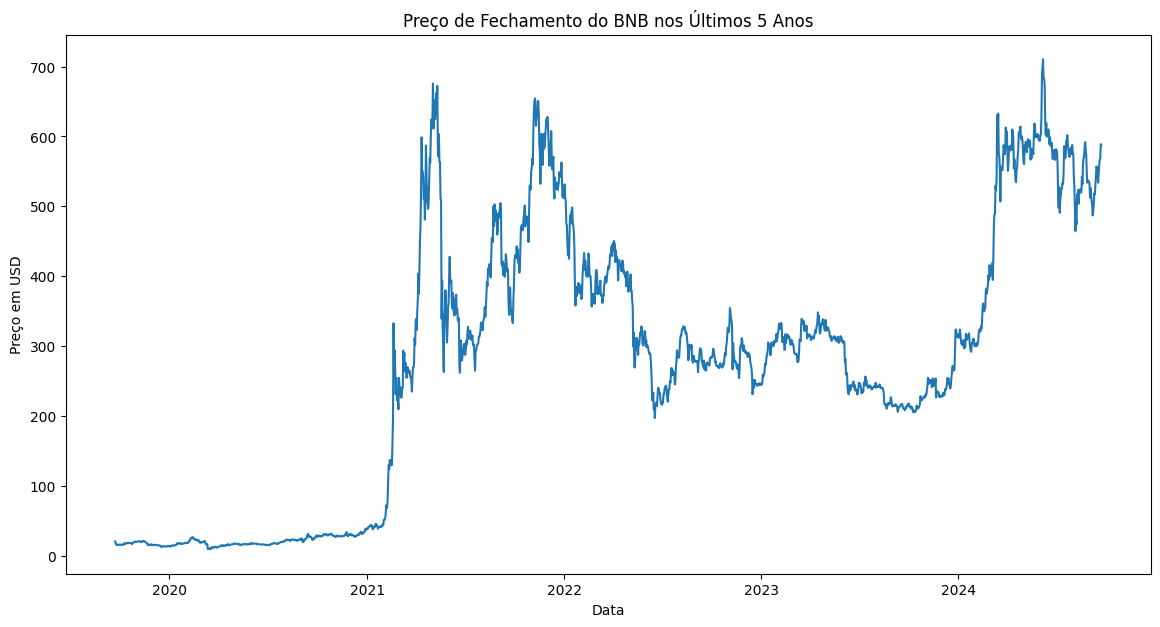

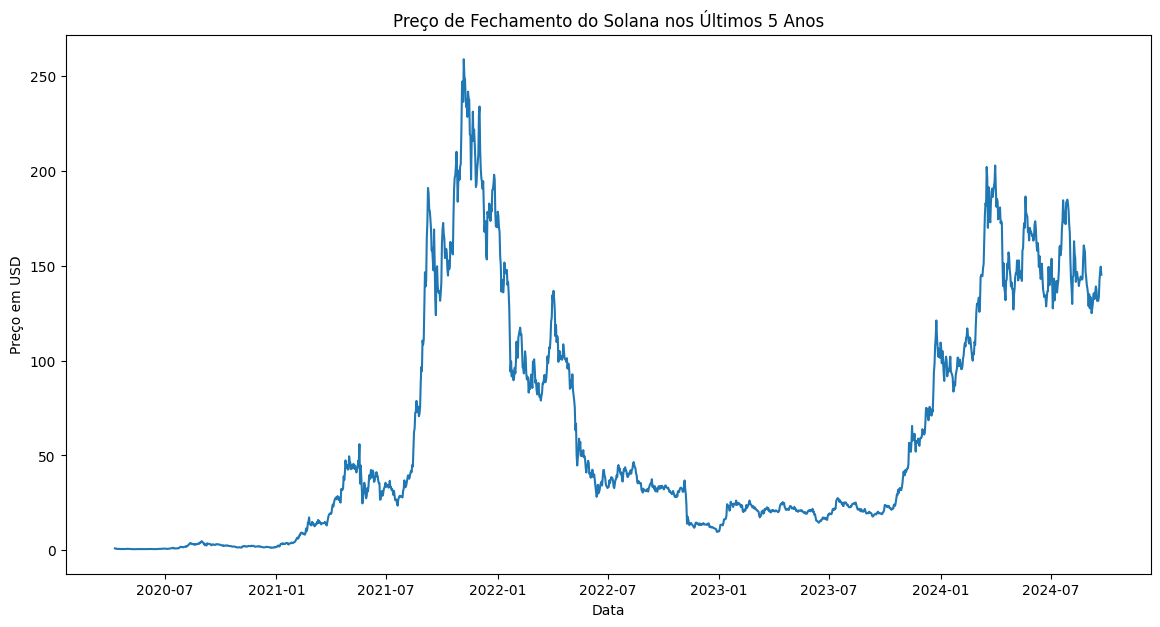

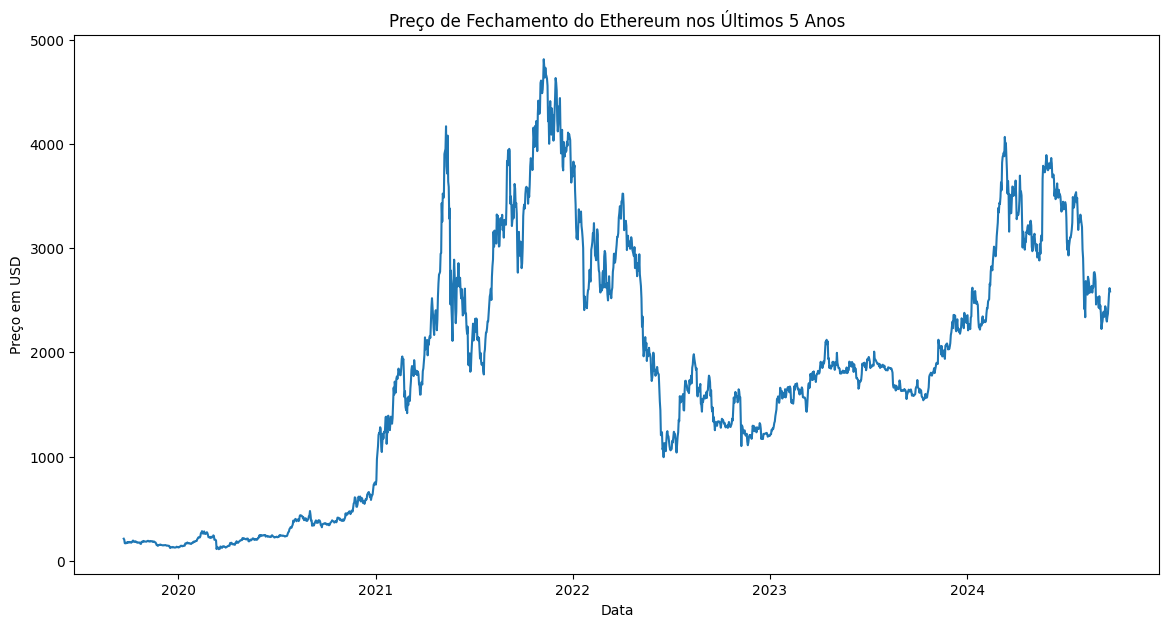

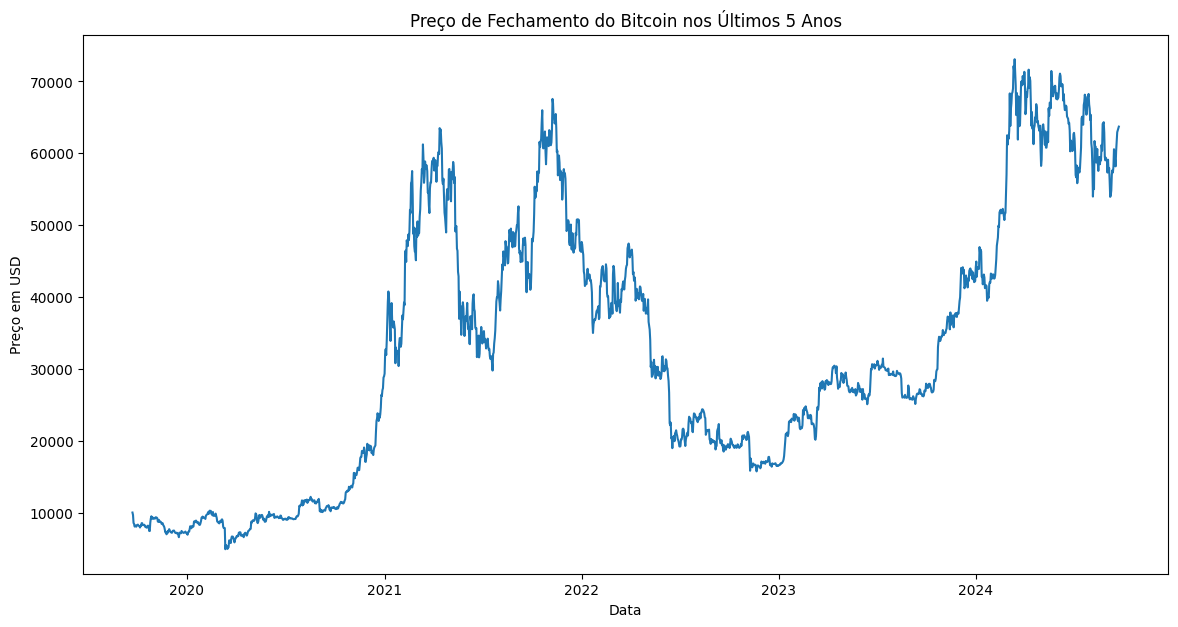

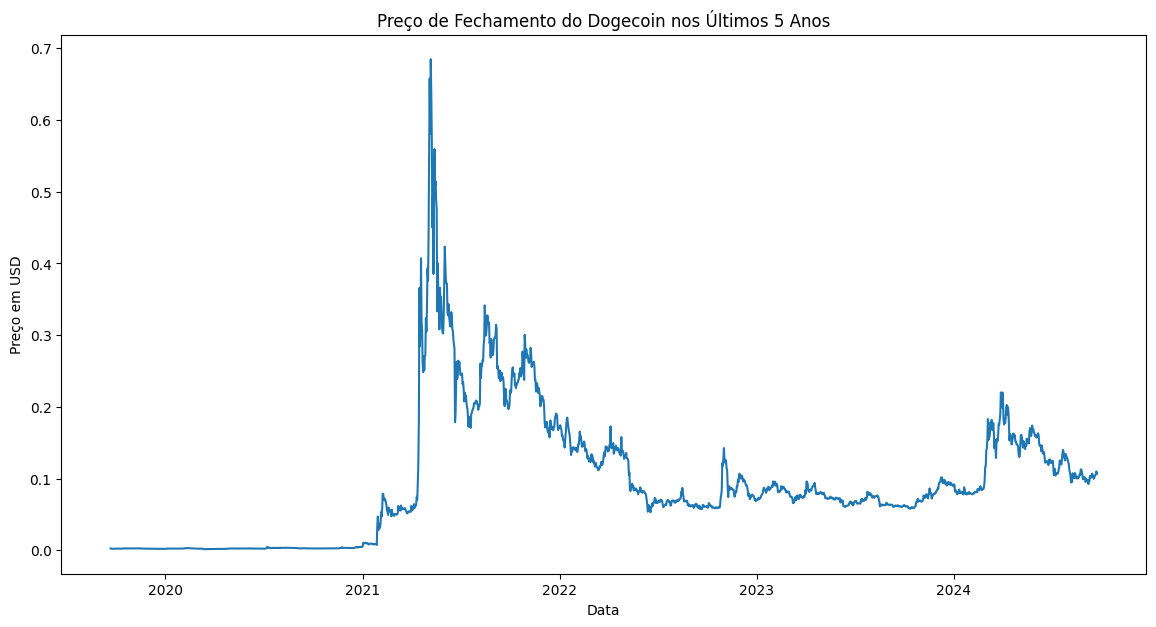

In [34]:
for name in data:
    plt.figure(figsize=(14,7))
    plt.plot(data[name]['Close'])
    plt.title(f'Preço de Fechamento do {name} nos Últimos 5 Anos')
    plt.xlabel('Data')
    plt.ylabel('Preço em USD')
    plt.show()

In [29]:
for name in data:
    print(f"Estatísticas Descritivas para {name}:")
    display(data[name]['Close'].describe())


Estatísticas Descritivas para BNB:


count    1828.000000
mean      273.042700
std       189.966859
min         9.386050
25%        33.263511
50%       284.411469
75%       398.410294
max       710.464050
Name: Close, dtype: float64

Estatísticas Descritivas para Solana:


count    1627.000000
mean       61.027410
std        61.997034
min         0.515273
25%        14.937441
50%        32.465298
75%       103.046013
max       258.934326
Name: Close, dtype: float64

Estatísticas Descritivas para Ethereum:


count    1828.000000
mean     1823.188276
std      1181.088483
min       110.605873
25%       636.095322
50%      1800.300476
75%      2681.718933
max      4812.087402
Name: Close, dtype: float64

Estatísticas Descritivas para Bitcoin:


count     1828.000000
mean     32262.520723
std      18621.537117
min       4970.788086
25%      16846.313477
50%      29268.015625
75%      46197.884766
max      73083.500000
Name: Close, dtype: float64

Estatísticas Descritivas para Dogecoin:


count    1828.000000
mean        0.094343
std         0.091865
min         0.001537
25%         0.004504
50%         0.074961
75%         0.133480
max         0.684777
Name: Close, dtype: float64

In [35]:
for name in data:
    print(f"Valores Nulos em {name}:")
    print(data[name].isnull().sum())


Valores Nulos em BNB:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Valores Nulos em Solana:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Valores Nulos em Ethereum:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Valores Nulos em Bitcoin:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Valores Nulos em Dogecoin:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [36]:
for name in data:
    df = data[name]
    # Médias móveis
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA100'] = df['Close'].rolling(window=100).mean()
    
    # Retorno diário
    df['Daily Return'] = df['Close'].pct_change()
    
    # Volatilidade
    df['Volatility'] = df['Close'].rolling(window=10).std()
    
    # Preço futuro (previsão)
    df['Future Close'] = df['Close'].shift(-1)
    

    df.dropna(inplace=True)
    
    data[name] = df


In [37]:
features = ['Close', 'MA10', 'MA50', 'MA100', 'Daily Return', 'Volatility']


# Escolha do Modelo:

## - Random Forest Regressor: Captura relações não lineares. Bom para dados complexos.
## - Support Vector Regressor (SVR): Eficiente em alta escala e usa diferentes funções kernel.

In [38]:
X_train = {}
X_test = {}
y_train = {}
y_test = {}

for name in data:
    df = data[name]
    X = df[features]
    y = df['Future Close']
    
    # Dividindo os dados
    X_train[name], X_test[name], y_train[name], y_test[name] = train_test_split(
        X, y, test_size=0.2, shuffle=False)


In [41]:

models = {}

for name in data:
    print(f"Treinando modelos para {name}")
    # Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train[name], y_train[name])
    
    # SVR
    svr = SVR(kernel='rbf')
    svr.fit(X_train[name], y_train[name])
    
    models[name] = {'RandomForest': rf, 'SVR': svr}


Treinando modelos para BNB
Treinando modelos para Solana
Treinando modelos para Ethereum
Treinando modelos para Bitcoin
Treinando modelos para Dogecoin


In [43]:
for name in data:
    print(f"\nTeste dos modelos para {name}")
    for model_name, model in models[name].items():
        y_pred = model.predict(X_test[name])
        rmse = np.sqrt(mean_squared_error(y_test[name], y_pred))
        mae = mean_absolute_error(y_test[name], y_pred)
        print(f"{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}")



Teste dos modelos para BNB
RandomForest - RMSE: 22.72, MAE: 15.26
SVR - RMSE: 139.56, MAE: 109.34

Teste dos modelos para Solana
RandomForest - RMSE: 7.64, MAE: 5.94
SVR - RMSE: 11.70, MAE: 8.18

Teste dos modelos para Ethereum
RandomForest - RMSE: 120.31, MAE: 87.14
SVR - RMSE: 1041.64, MAE: 889.37

Teste dos modelos para Bitcoin
RandomForest - RMSE: 2952.92, MAE: 2226.16
SVR - RMSE: 30479.03, MAE: 27878.77

Teste dos modelos para Dogecoin
RandomForest - RMSE: 0.01, MAE: 0.01
SVR - RMSE: 0.06, MAE: 0.06


In [44]:
best_models = {}

for name in data:
    model_performance = {}
    for model_name, model in models[name].items():
        y_pred = model.predict(X_test[name])
        rmse = np.sqrt(mean_squared_error(y_test[name], y_pred))
        model_performance[model_name] = rmse
    best_model_name = min(model_performance, key=model_performance.get)
    best_models[name] = models[name][best_model_name]
    print(f"Melhor modelo para {name}: {best_model_name}")


Melhor modelo para BNB: RandomForest
Melhor modelo para Solana: RandomForest
Melhor modelo para Ethereum: RandomForest
Melhor modelo para Bitcoin: RandomForest
Melhor modelo para Dogecoin: RandomForest


In [56]:

def plot_signals(df, name):
    plt.figure(figsize=(16,10))
    
    # Gráfico principal: Preço de Fechamento e Médias Móveis
    ax1 = plt.subplot(3, 1, 1)
    ax1.plot(df.index, df['Close'], label='Preço de Fechamento', color='blue', alpha=0.7)
    ax1.plot(df.index, df['MA10'], label='Média Móvel 10', color='orange', linestyle='--')
    ax1.plot(df.index, df['MA50'], label='Média Móvel 50', color='magenta', linestyle='--')
    ax1.set_title(f'Sinais de Compra e Venda para {name}')
    ax1.set_ylabel('Preço em USD')
    ax1.legend(loc='upper left')
    
    # Sinais de Compra e Venda
    ax1.plot(df.loc[df['Signal'] == 1].index, 
             df['Close'][df['Signal'] == 1],
             '^', markersize=10, color='green', label='Sinal de Compra')
    ax1.plot(df.loc[df['Signal'] == -1].index, 
             df['Close'][df['Signal'] == -1],
             'v', markersize=10, color='red', label='Sinal de Venda')
    
    # Formatação da data
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    
    # Gráfico de Retorno Diário
    ax2 = plt.subplot(3, 1, 2, sharex=ax1)
    ax2.plot(df.index, df['Daily Return'], label='Retorno Diário', color='purple')
    ax2.set_ylabel('Retorno Diário')
    ax2.legend(loc='upper left')
    
    # Gráfico de Volatilidade
    ax3 = plt.subplot(3, 1, 3, sharex=ax1)
    ax3.plot(df.index, df['Volatility'], label='Volatilidade', color='brown')
    ax3.set_ylabel('Volatilidade')
    ax3.set_xlabel('Data')
    ax3.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()


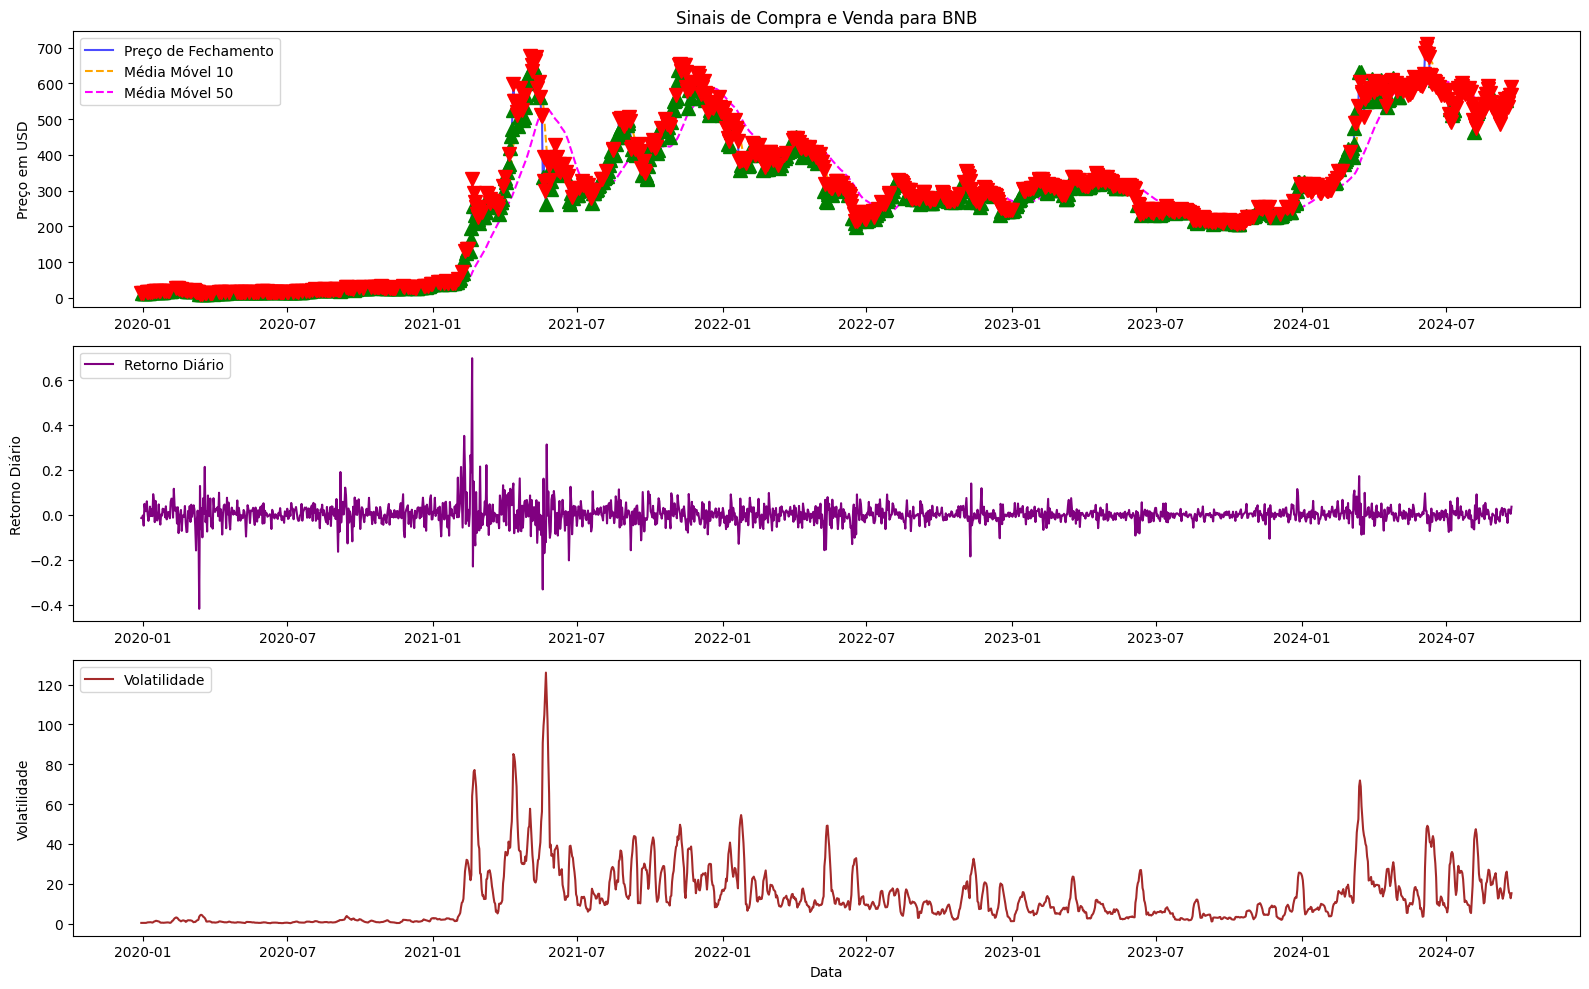

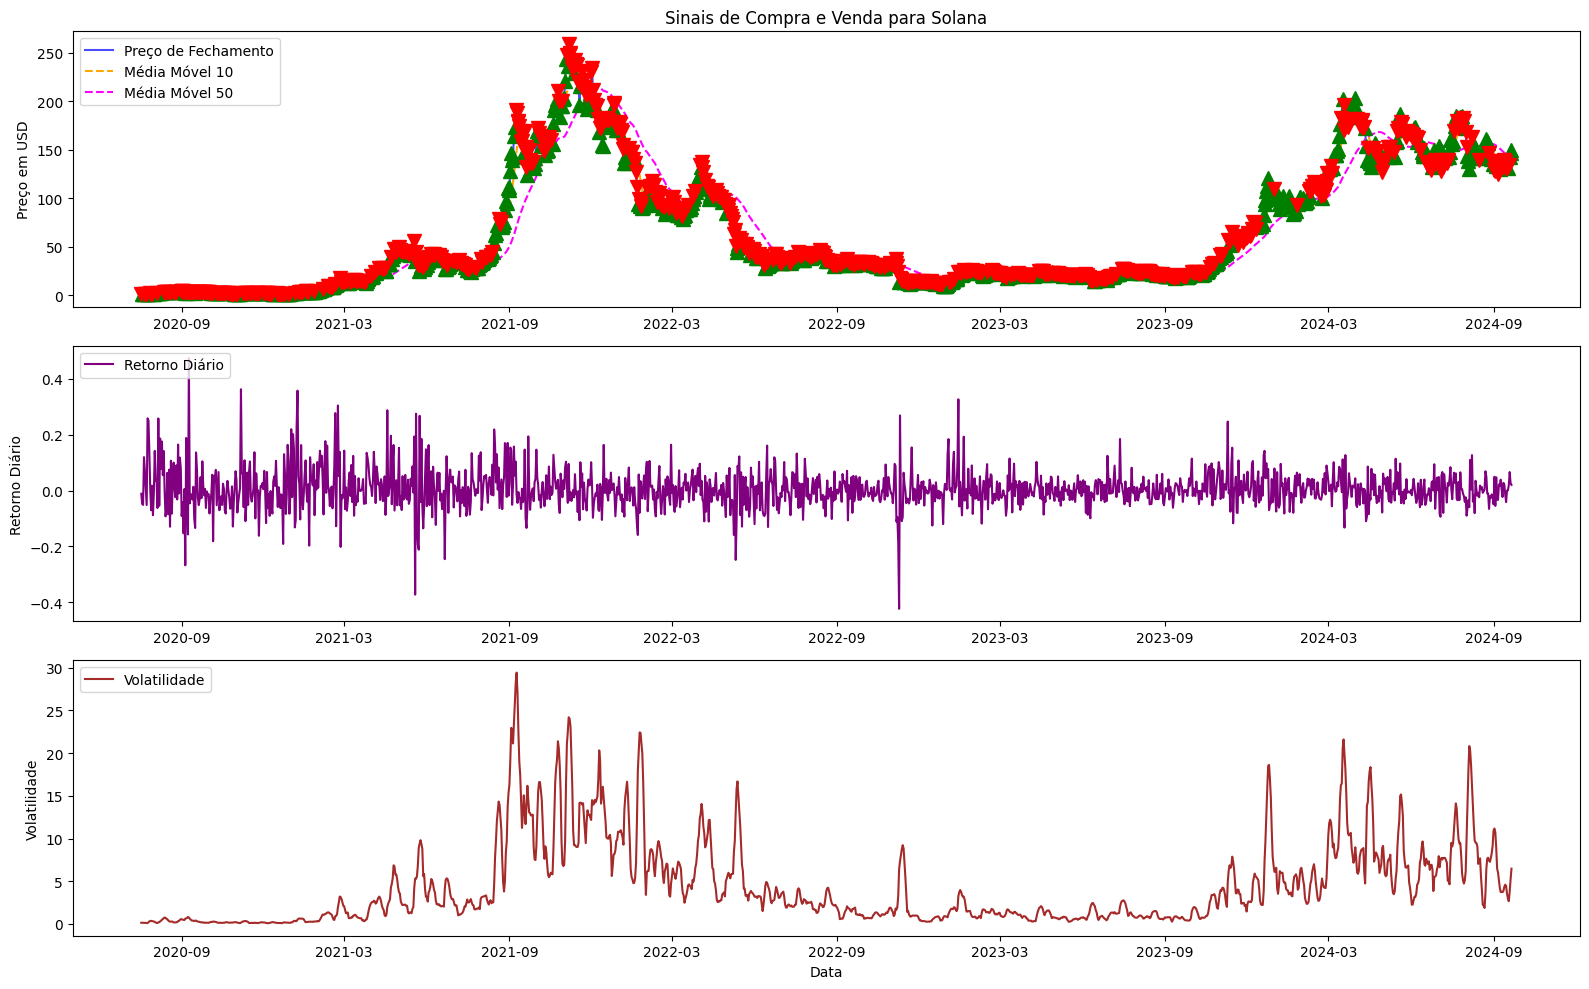

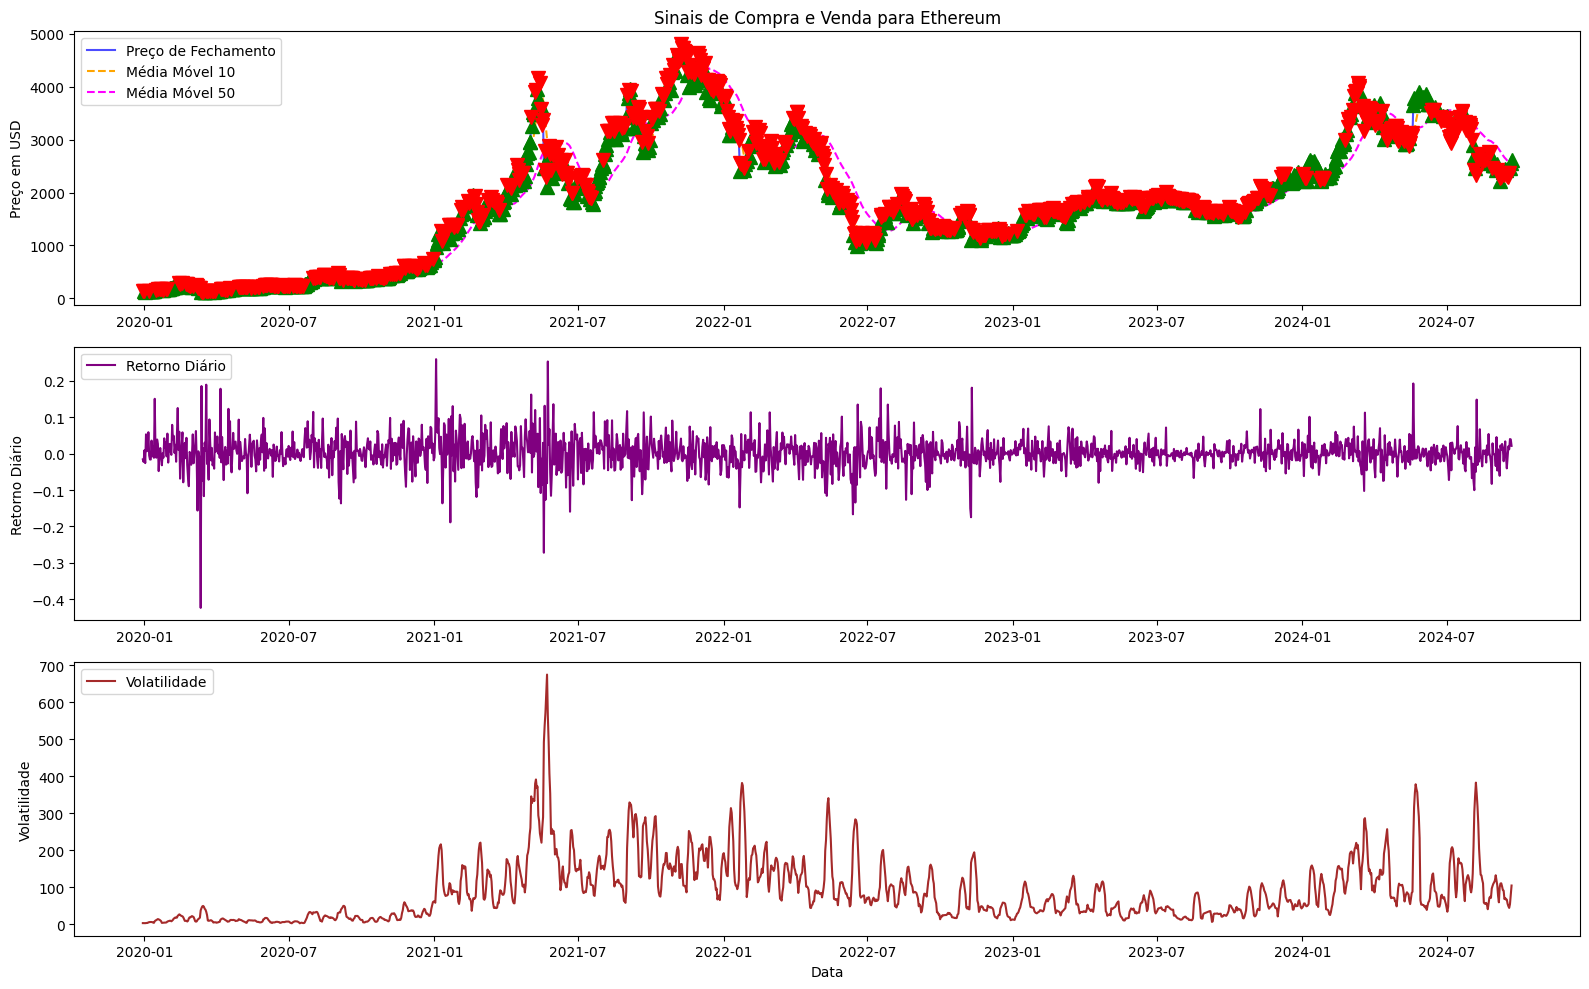

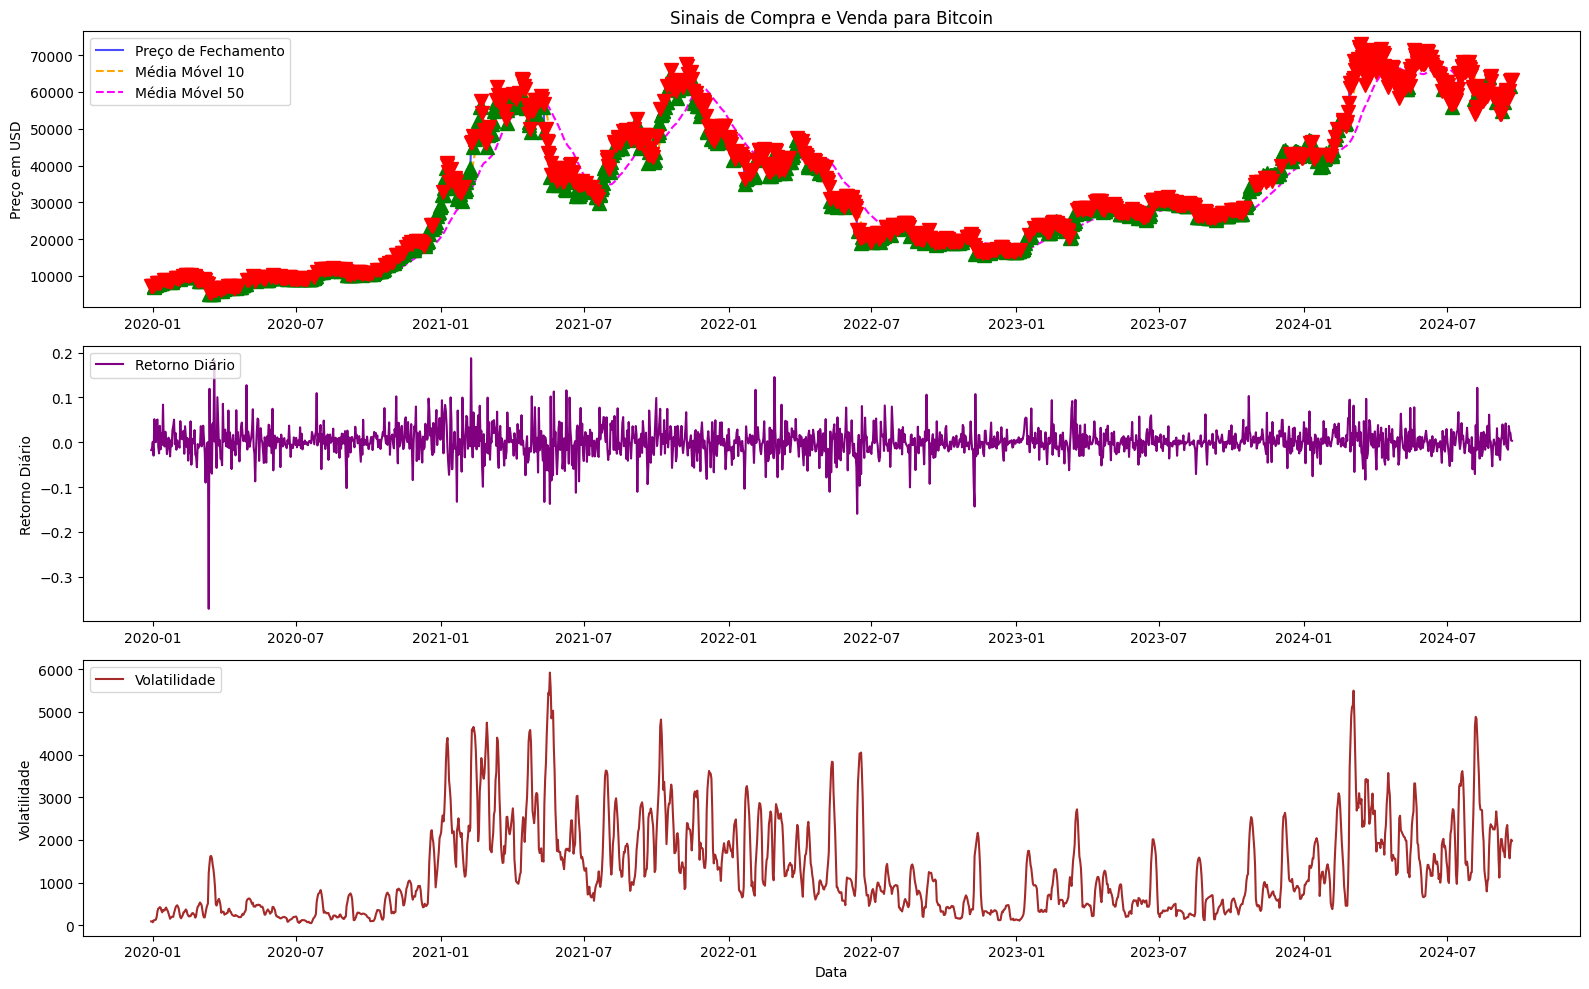

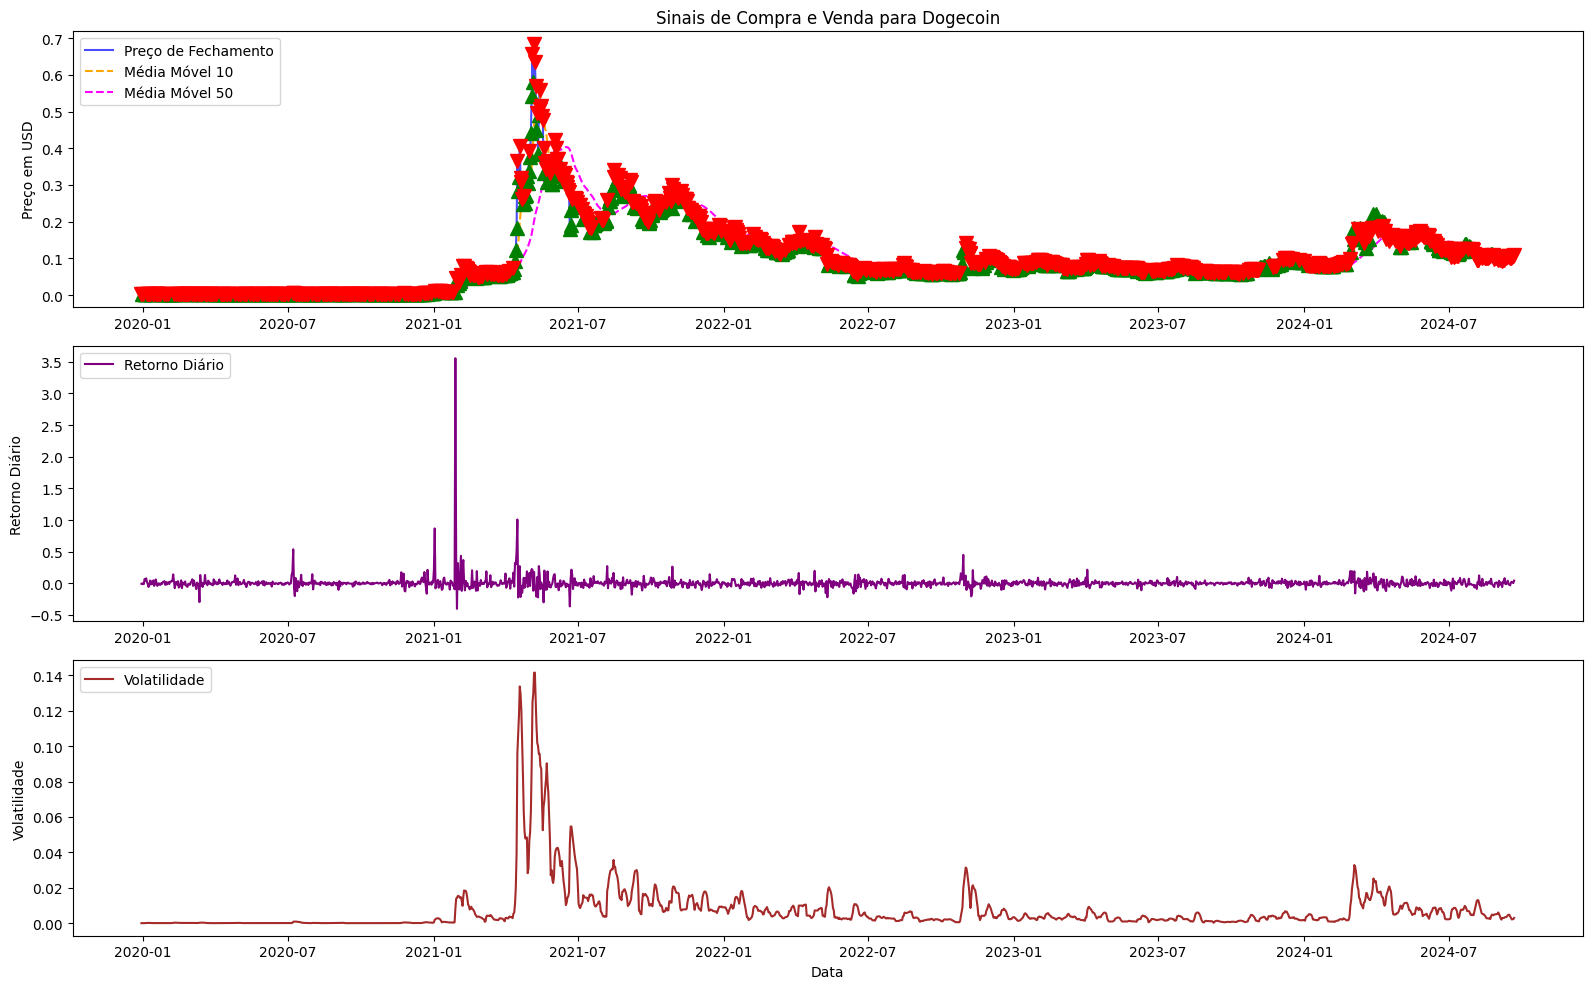

In [57]:
for name in data:
    df = data[name]
    plot_signals(df, name)


In [58]:
def plot_signals_zoom(df, name, start_date, end_date):
    df_zoom = df.loc[start_date:end_date]
    plot_signals(df_zoom, name)


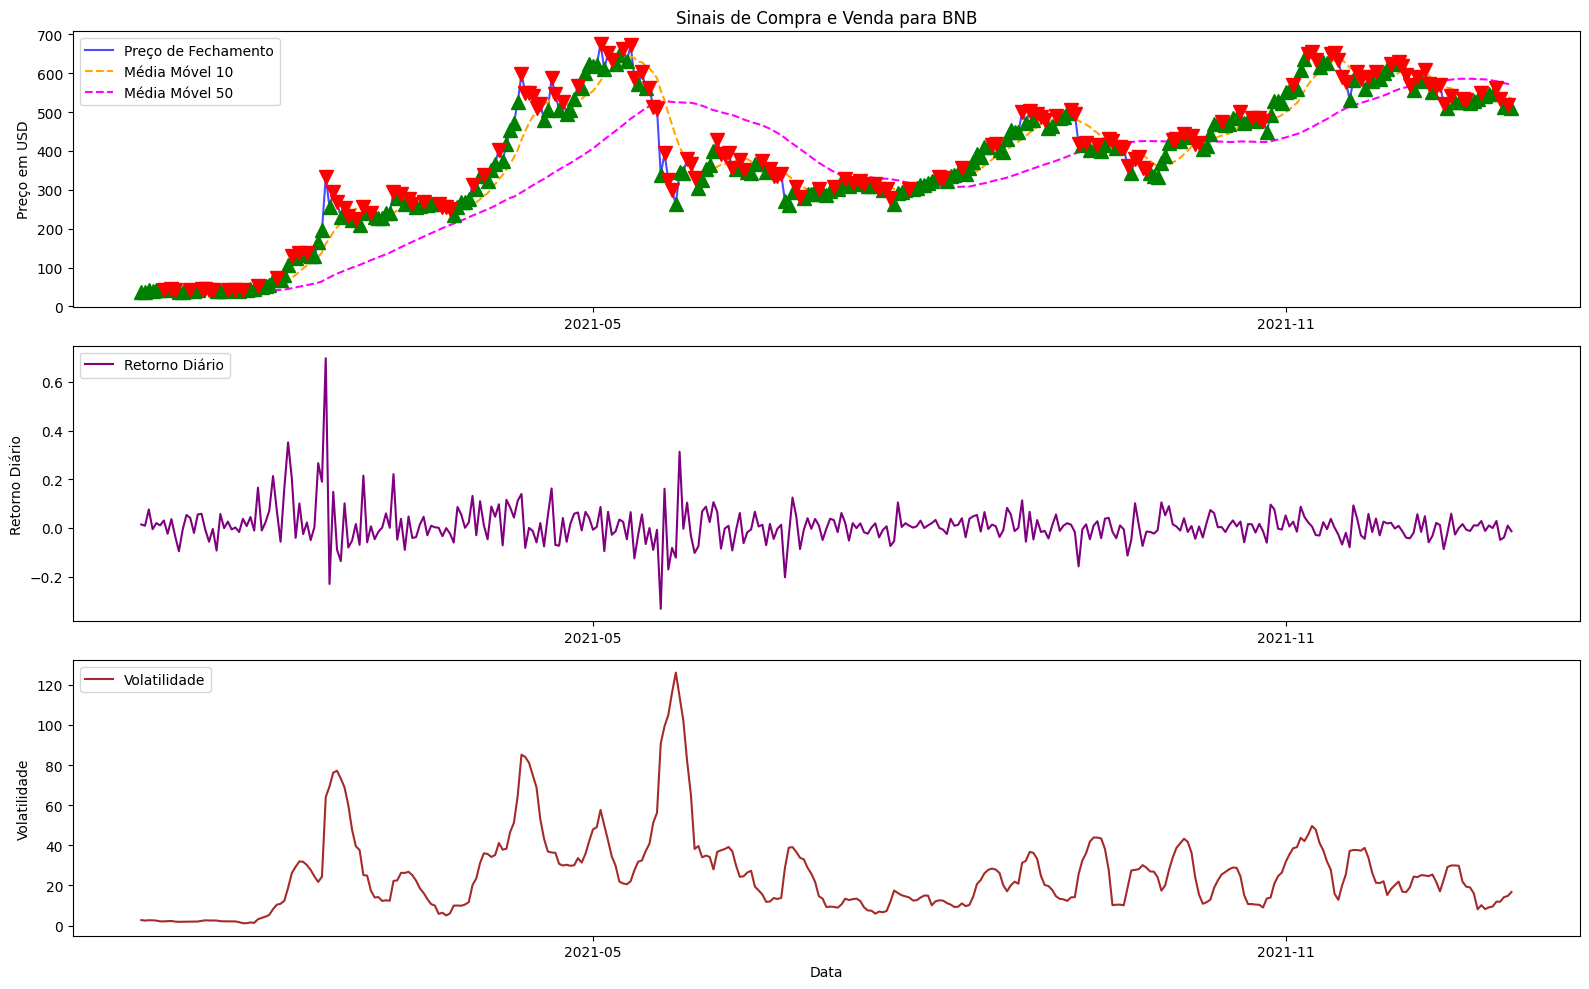

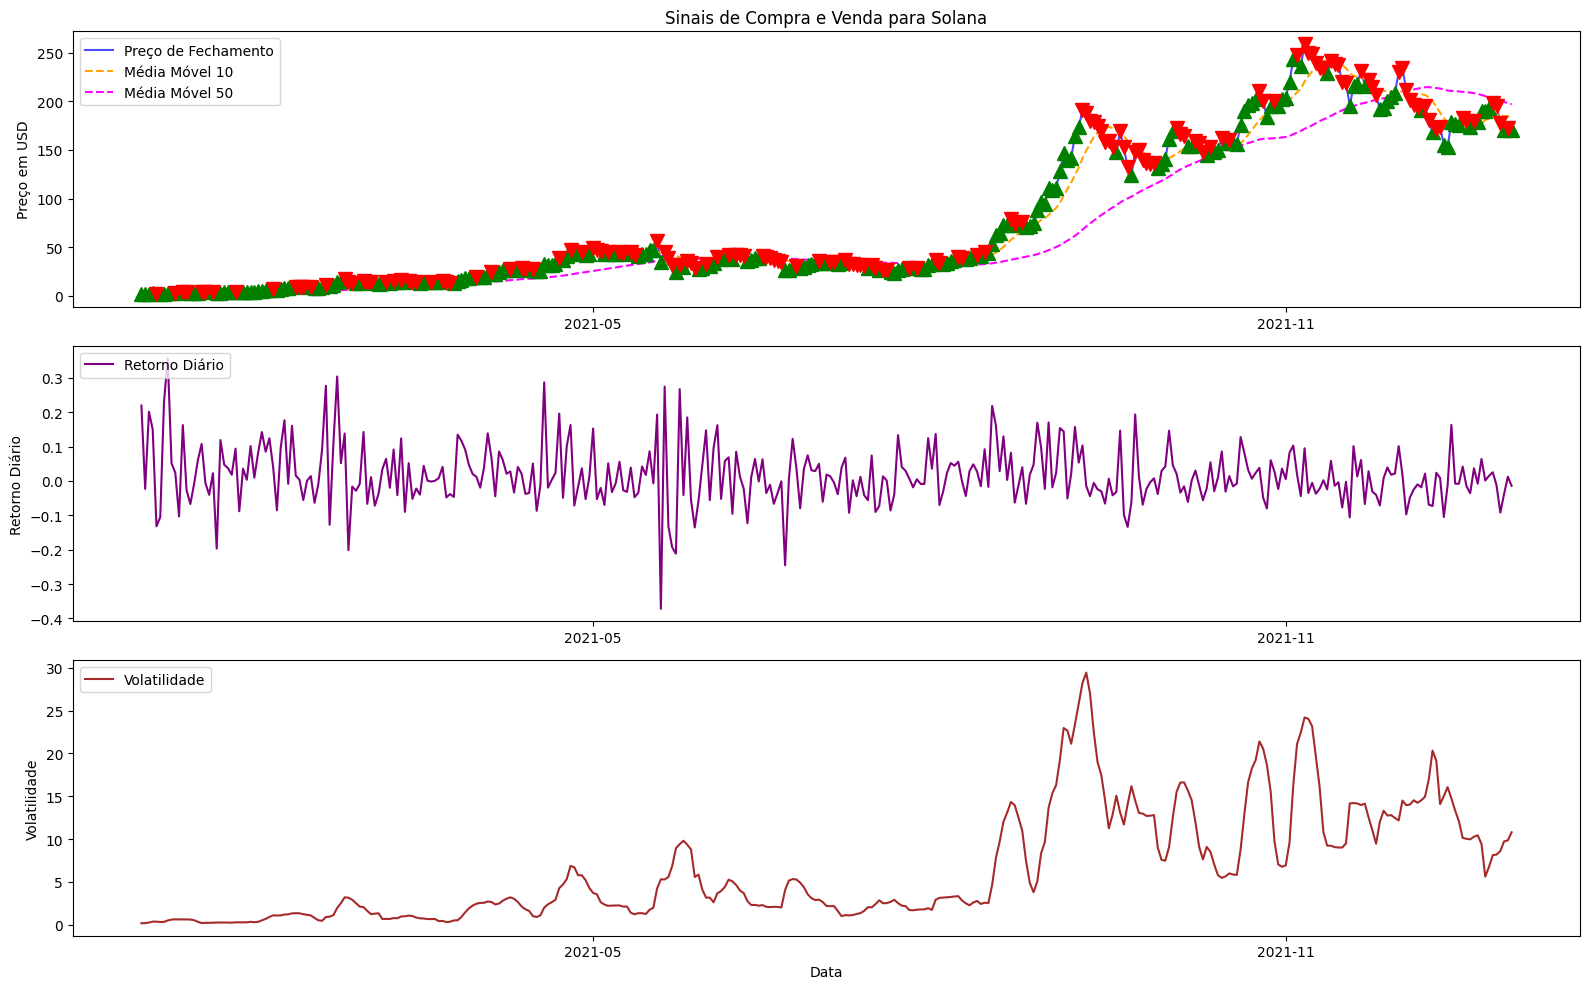

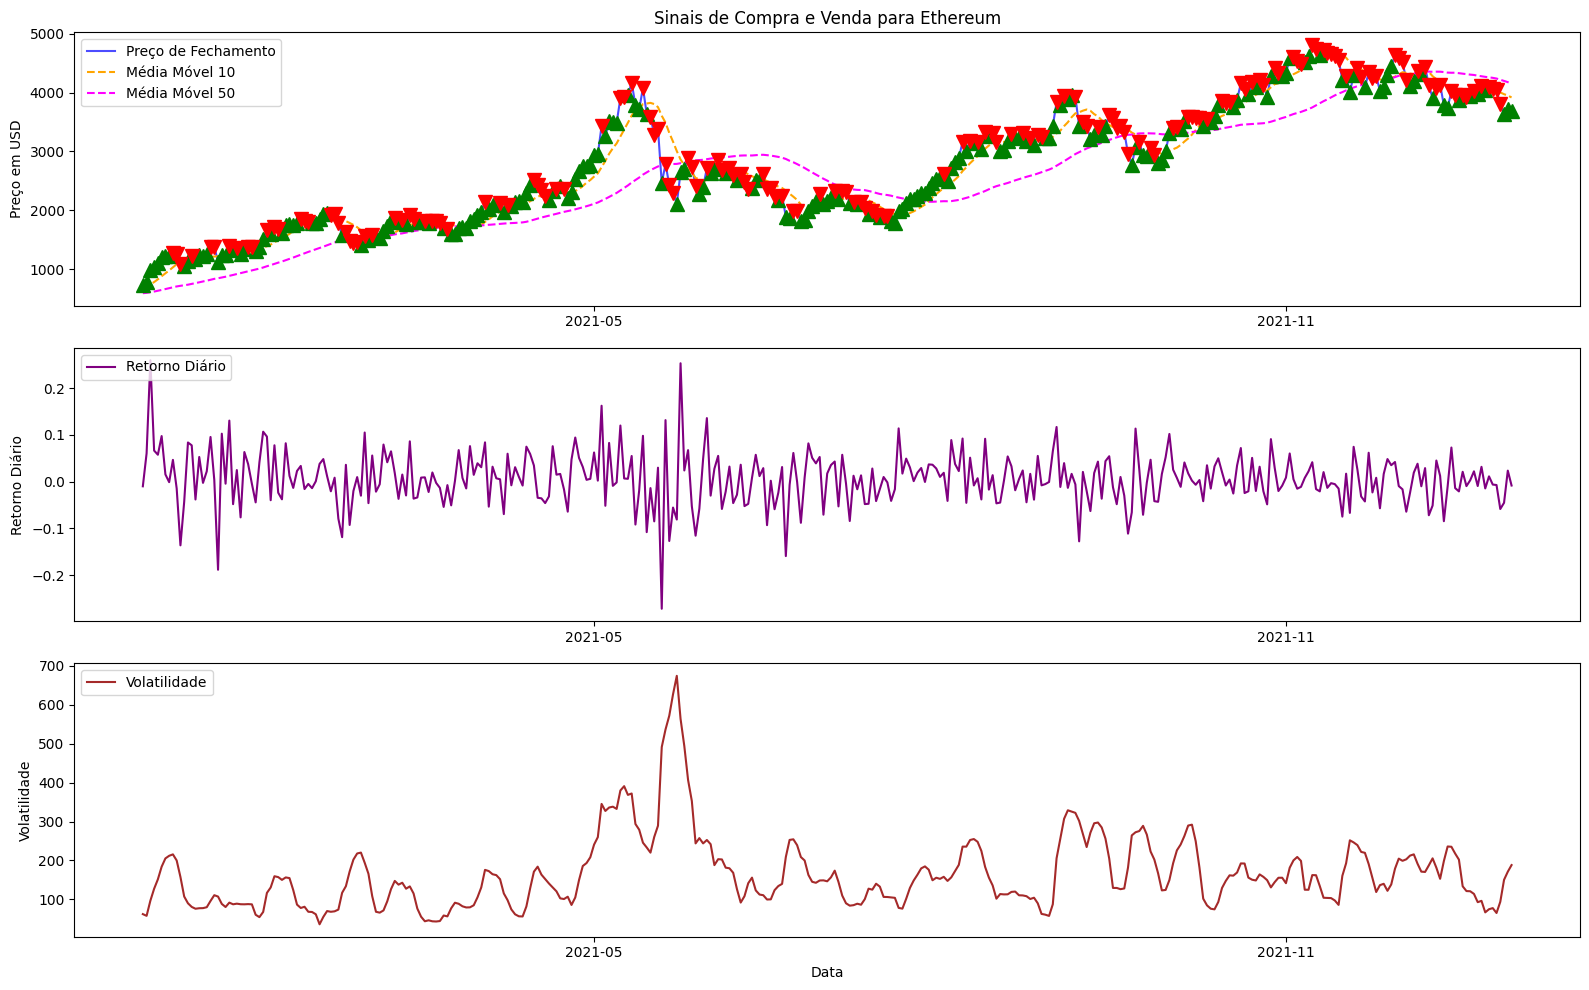

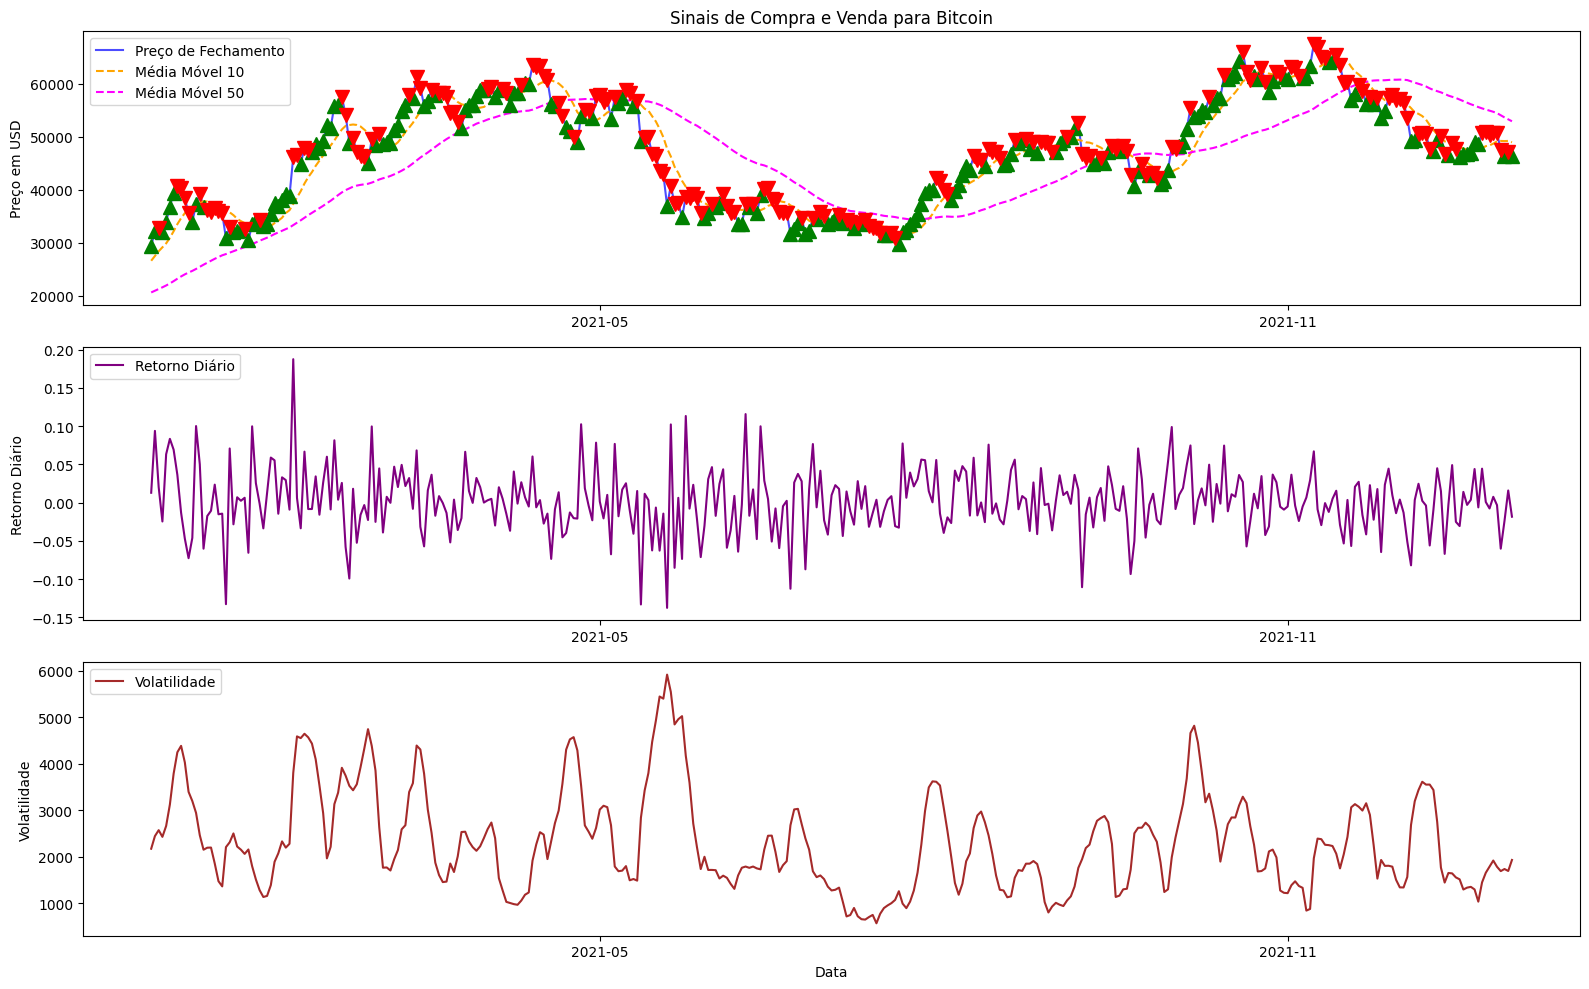

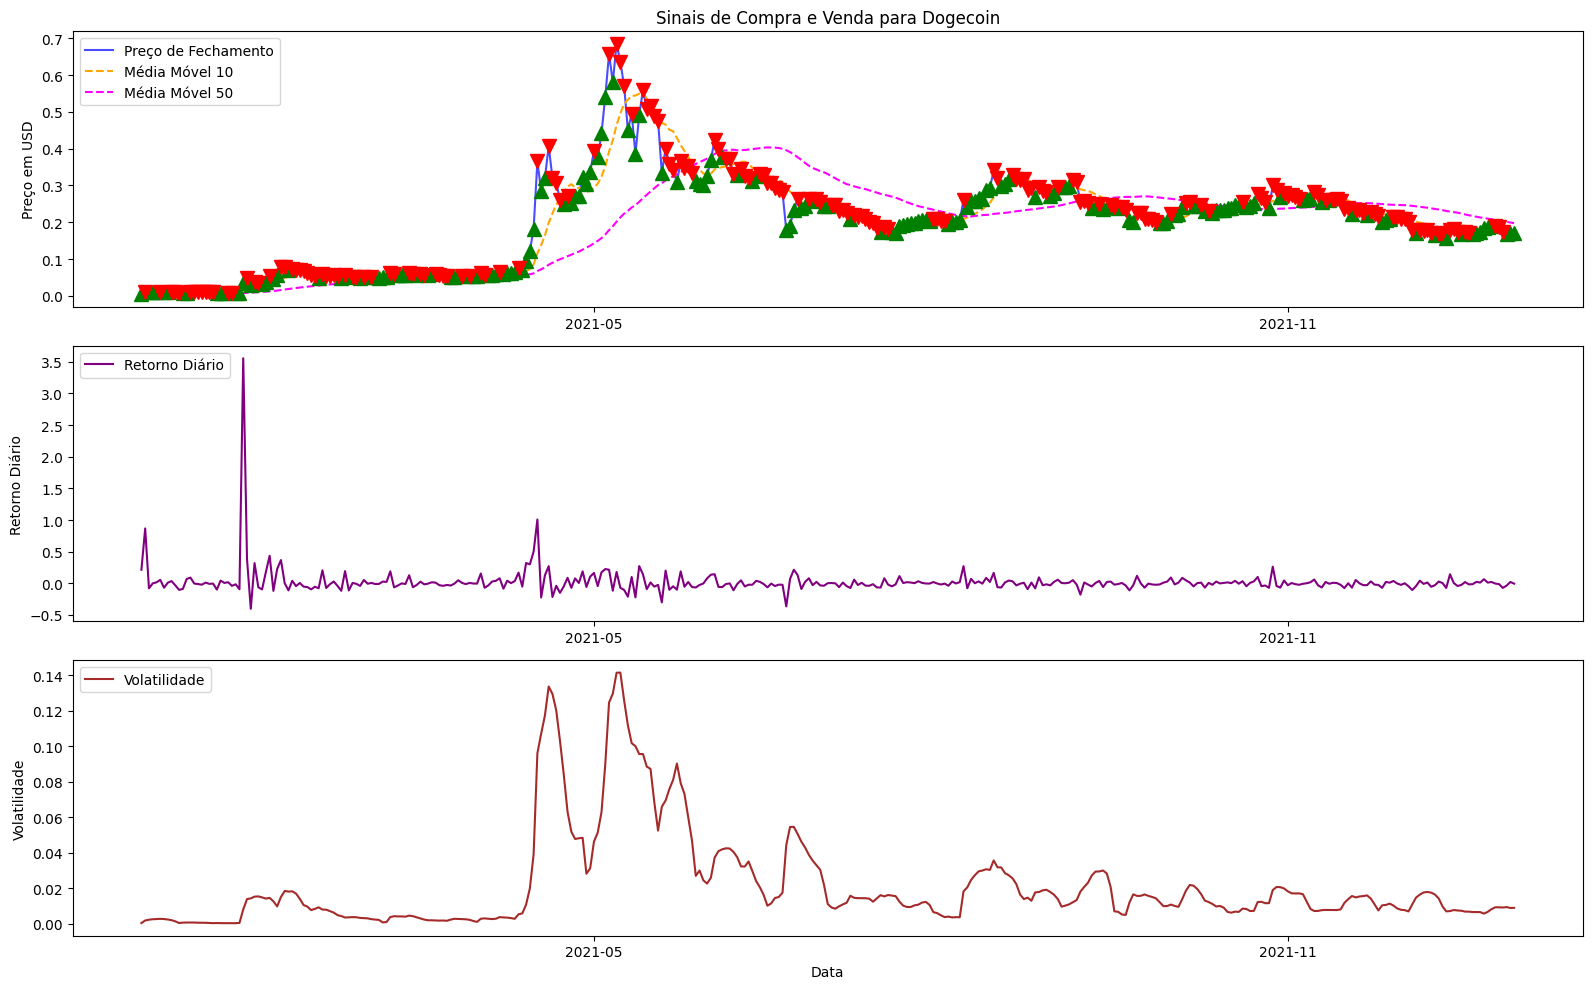

In [59]:
# Definindo o período
start_date = '2021-01-01'
end_date = '2021-12-31'

for name in data:
    df = data[name]
    plot_signals_zoom(df, name, start_date, end_date)


## Calculando o Retorno da Estratégia


In [60]:
for name in data:
    df = data[name]
    # Retorno diário da estratégia
    df['Strategy Return'] = df['Daily Return'] * df['Signal'].shift(1)
    # Retorno cumulativo
    df['Cumulative Market Returns'] = (1 + df['Daily Return']).cumprod()
    df['Cumulative Strategy Returns'] = (1 + df['Strategy Return']).cumprod()
    data[name] = df


In [61]:
def plot_cumulative_returns(df, name):
    plt.figure(figsize=(14,7))
    plt.plot(df['Cumulative Market Returns'], label='Retorno do Mercado', color='blue')
    plt.plot(df['Cumulative Strategy Returns'], label='Retorno da Estratégia', color='green')
    plt.title(f'Retorno Cumulativo para {name}')
    plt.xlabel('Data')
    plt.ylabel('Retorno Cumulativo')
    plt.legend()
    plt.grid(True)
    plt.show()


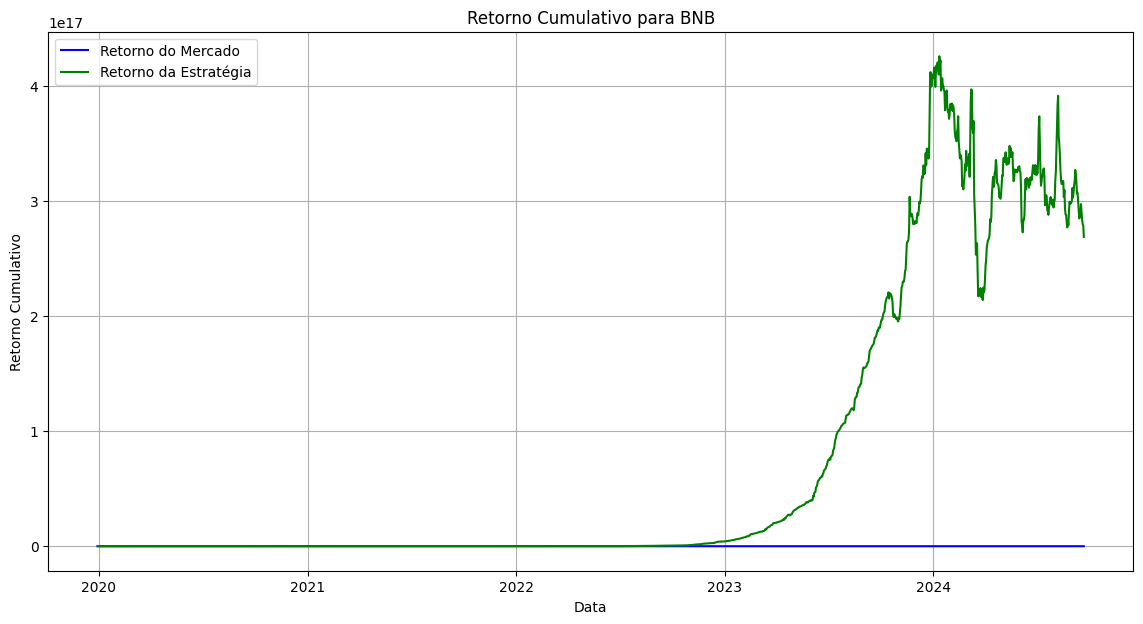

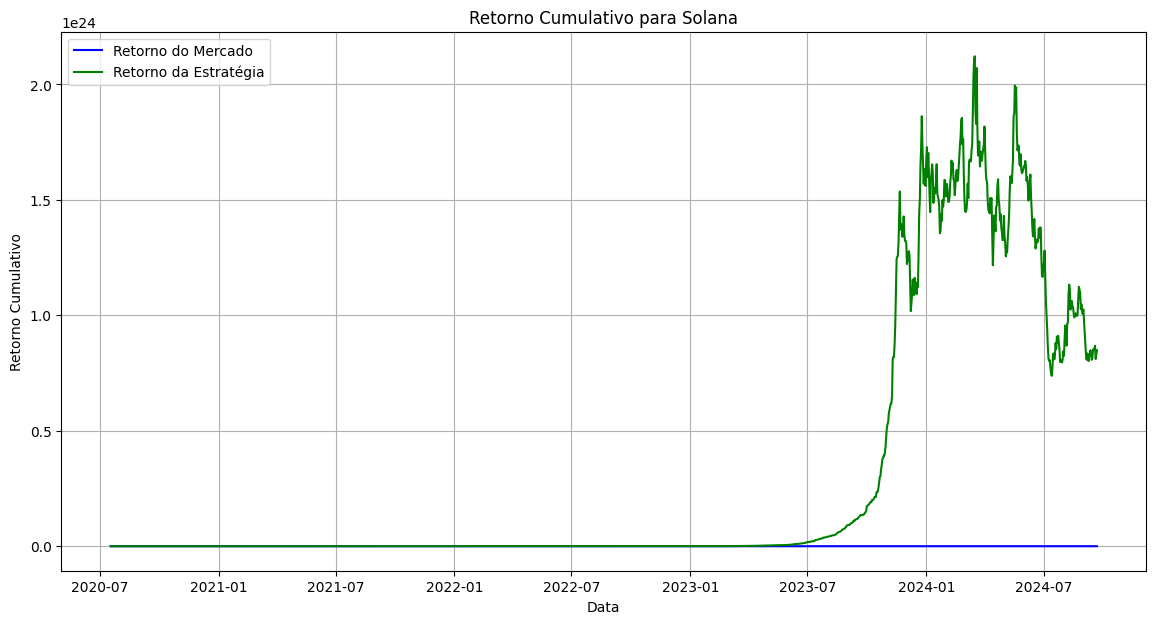

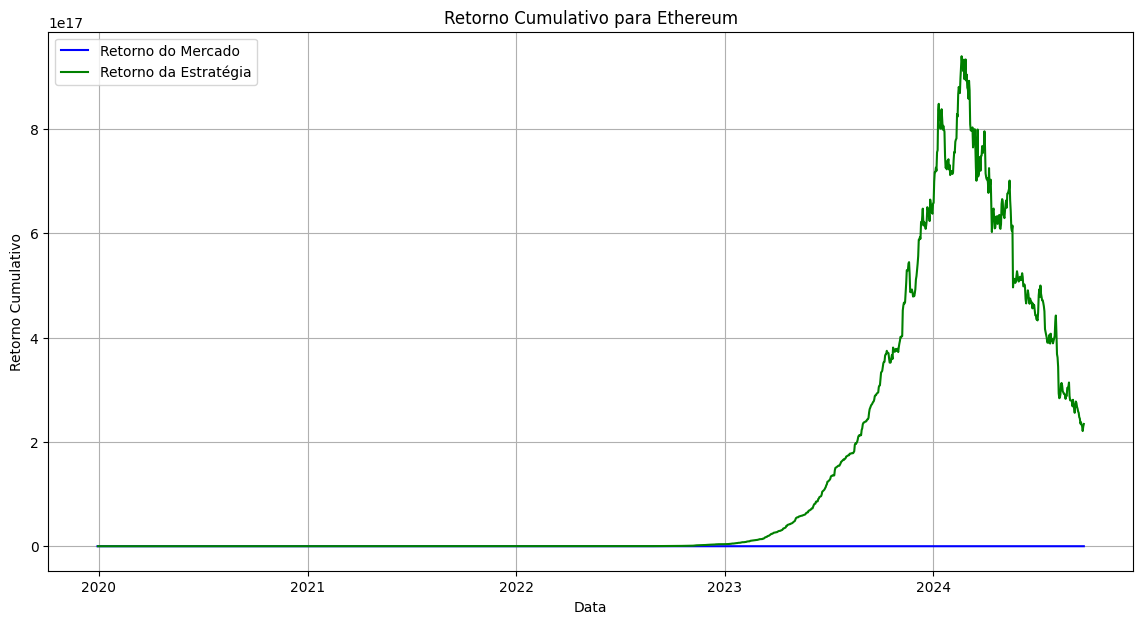

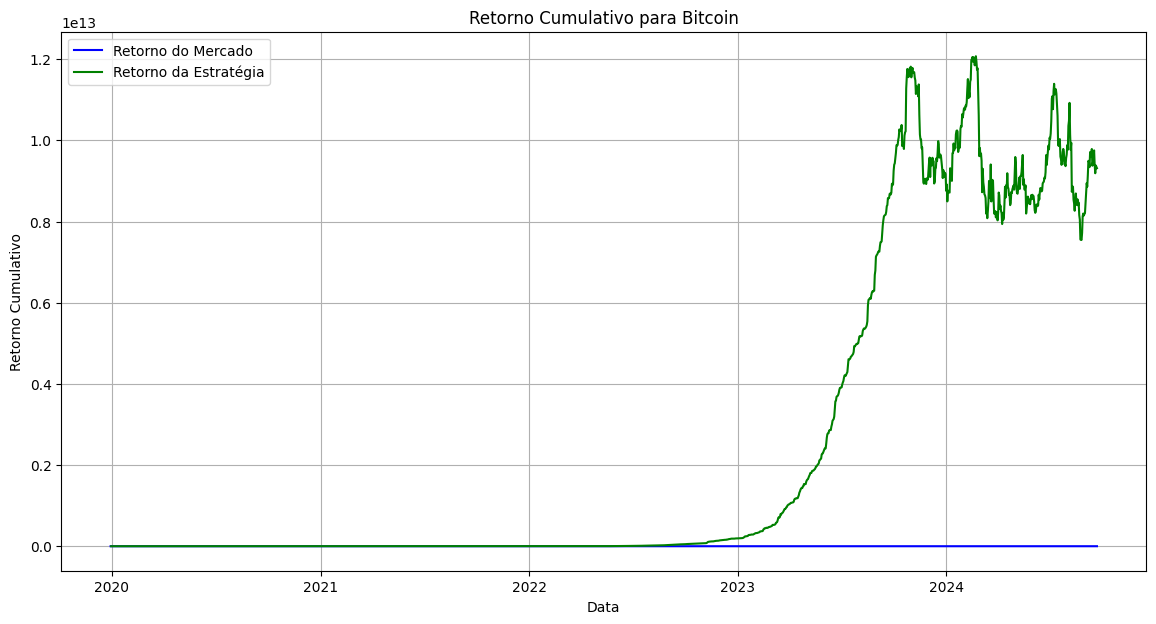

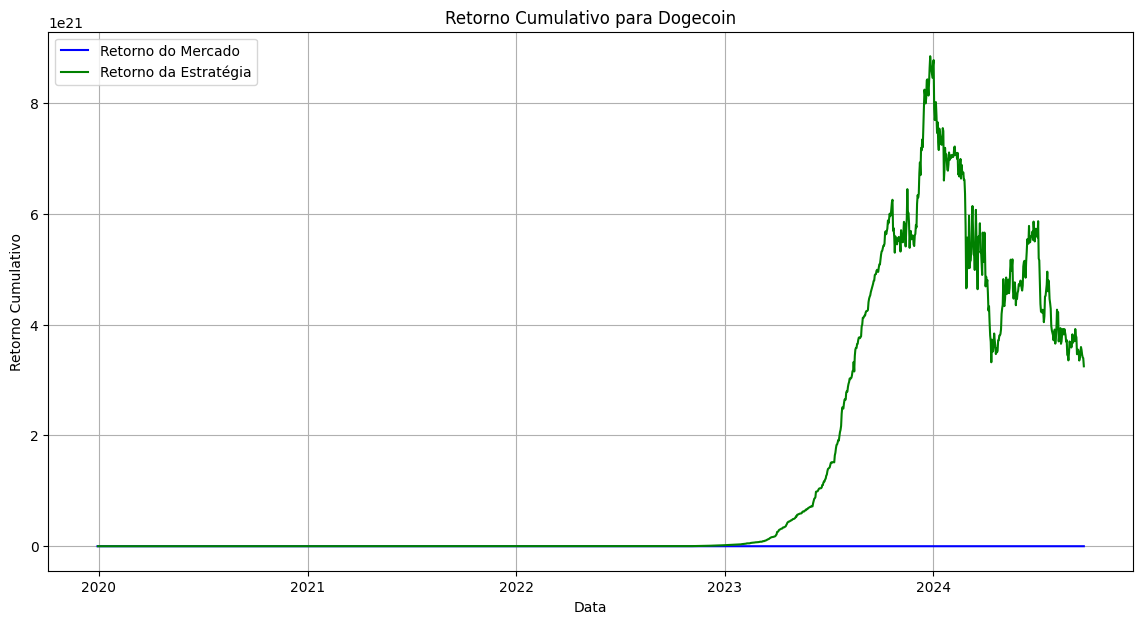

In [62]:
for name in data:
    df = data[name]
    plot_cumulative_returns(df, name)


In [63]:
for name in data:
    df = data[name]
    # Taxa livre de risco (assumimos zero para simplificação)
    risk_free_rate = 0
    # Excesso de retorno
    excess_returns = df['Strategy Return'] - risk_free_rate
    # Sharpe Ratio
    sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * np.sqrt(252)
    print(f"Sharpe Ratio para {name}: {sharpe_ratio:.2f}")


Sharpe Ratio para BNB: 9.21
Sharpe Ratio para Solana: 10.64
Sharpe Ratio para Ethereum: 10.39
Sharpe Ratio para Bitcoin: 9.79
Sharpe Ratio para Dogecoin: 4.78
